In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [23]:
(X_train, y_train), (X_test, y_test )= mnist.load_data()

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


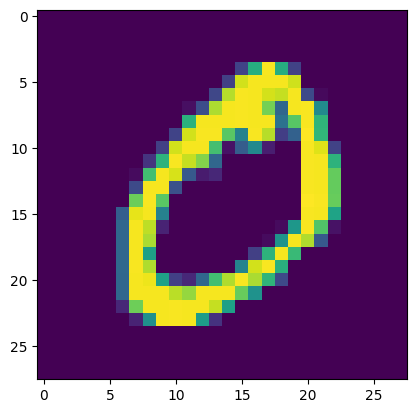

In [25]:
plt.imshow(X_train[1])

In [26]:
y_train[1]

0

In [27]:
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [28]:
y_test_new[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [34]:
X_train_reshape = np.reshape(X_train, (60000,784))/255
X_test_reshape = np.reshape(X_test, (10000, 784))/255

In [30]:
X_test_reshape.shape

(10000, 784)

In [35]:
set(X_train_reshape[1])

{0.0,
 0.023529411764705882,
 0.027450980392156862,
 0.0392156862745098,
 0.047058823529411764,
 0.07450980392156863,
 0.08235294117647059,
 0.09803921568627451,
 0.10980392156862745,
 0.11372549019607843,
 0.1450980392156863,
 0.14901960784313725,
 0.1843137254901961,
 0.18823529411764706,
 0.19607843137254902,
 0.2,
 0.21176470588235294,
 0.2196078431372549,
 0.2235294117647059,
 0.23529411764705882,
 0.24705882352941178,
 0.2784313725490196,
 0.29411764705882354,
 0.2980392156862745,
 0.30980392156862746,
 0.32941176470588235,
 0.3333333333333333,
 0.33725490196078434,
 0.3764705882352941,
 0.4392156862745098,
 0.4470588235294118,
 0.4745098039215686,
 0.47843137254901963,
 0.5019607843137255,
 0.5098039215686274,
 0.5137254901960784,
 0.5294117647058824,
 0.5529411764705883,
 0.5686274509803921,
 0.5725490196078431,
 0.5803921568627451,
 0.6235294117647059,
 0.6352941176470588,
 0.6392156862745098,
 0.6470588235294118,
 0.6549019607843137,
 0.6588235294117647,
 0.6784313725490196,


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
model = Sequential([
    Dense(256, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [38]:
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [40]:
h = model.fit(
    X_train_reshape,
    y_train_new,
    epochs = 5
)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6299 - accuracy: 0.8300
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2532 - accuracy: 0.9272
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1984 - accuracy: 0.9430
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1635 - accuracy: 0.9525
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1387 - accuracy: 0.9598


In [42]:
model.evaluate(X_test_reshape, y_test_new)

313/313 [==============================] - 1s 2ms/step - loss: 0.1318 - accuracy: 0.9606


[0.13177533447742462, 0.9606000185012817]

In [43]:
prediction= model.predict(X_test_reshape)

313/313 [==============================] - 1s 2ms/step


In [44]:
prediction.shape

(10000, 10)

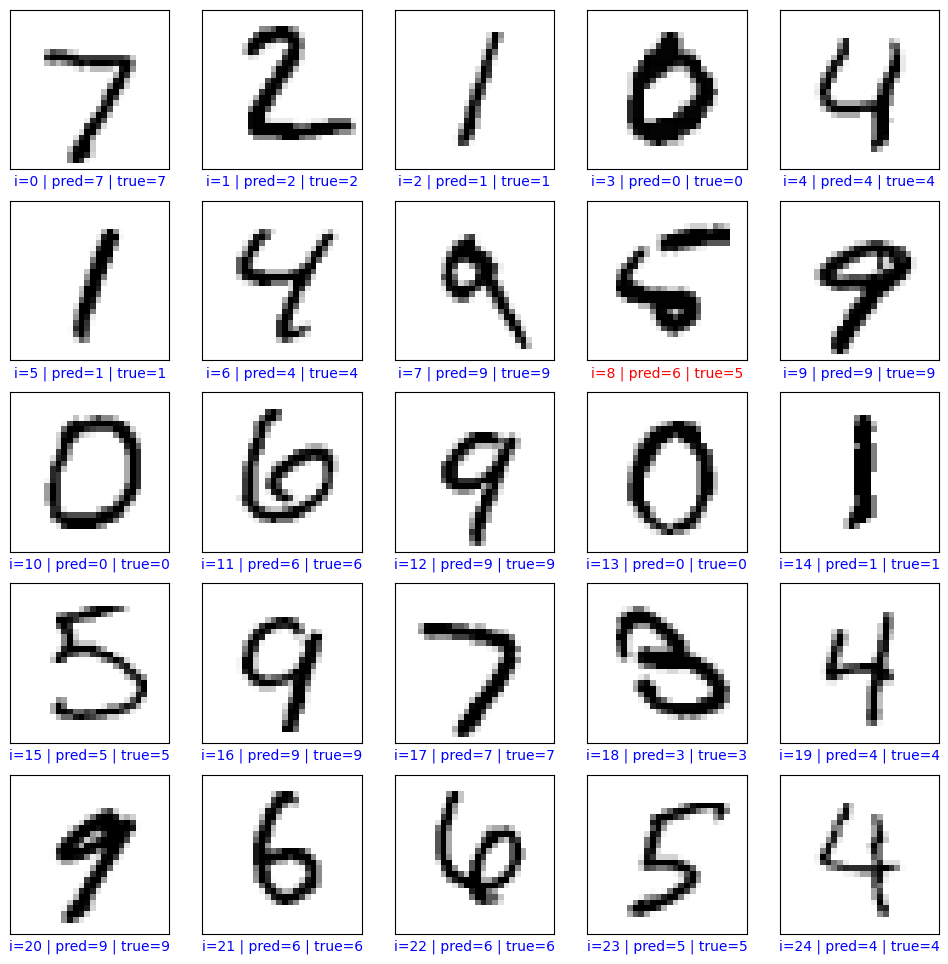

In [47]:
plt.figure(figsize = (12, 12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(prediction[start_index + i])
    actual = np.argmax(y_test_new[start_index + i])
    col = 'blue'
    if pred != actual:
        col = 'red'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(X_test[start_index + i], cmap='binary')
plt.show()